# Test ELFI custom priors

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import elfi

# Uniform disk

In [3]:
class CustomPrior_disk(elfi.Distribution):
    def rvs(r = 47.9, size=1, random_state=None):
        r2 = sps.uniform.rvs(loc=0, scale=r**2, size=size, random_state=random_state)
        theta = sps.uniform.rvs(loc=0, scale=2*np.pi, size=size, random_state=random_state)
        
        x = r2**0.5 * np.cos(theta)
        y = r2**0.5 * np.sin(theta)
        return x, y

class CustomPrior_x(elfi.Distribution):
    def rvs(pos, size=1, random_state=None):
        return pos[0]
    
class CustomPrior_y(elfi.Distribution):
    def rvs(pos, size=1, random_state=None):
        return pos[1]

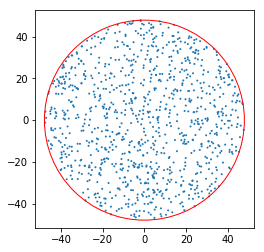

In [4]:
pos = CustomPrior_disk.rvs(size = 1000)
x = CustomPrior_x.rvs(pos, size = 1000)
y = CustomPrior_y.rvs(pos, size = 1000)

plt.scatter(x, y, s=4, edgecolor='none')
#plt.hist2d(x, y, bins=100)
#plt.colorbar()
plt.gca().add_artist(plt.Circle((0,0), 47.9, color='red', fill=False))
plt.gca().set_aspect(1)

In [5]:
p0 = elfi.Prior(CustomPrior_disk, 47.9)

In [6]:
px = elfi.Prior(CustomPrior_x, p0)
py = elfi.Prior(CustomPrior_y, p0)

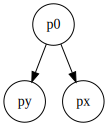

In [7]:
elfi.draw(p0)

# Bounded 2D Normal

In [8]:
class CustomPrior_Bounded2DNormal(elfi.Distribution):
    def rvs(mu, std, r_bound = 47.9, size=1, random_state=None):
        xs = np.zeros(size)
        ys = np.zeros(size)
        
        for i in range(size):
            out_of_bounds = True
            while out_of_bounds:
                x = sps.norm.rvs(loc=mu[0], scale=std, size=1, random_state=random_state)
                y = sps.norm.rvs(loc=mu[1], scale=std, size=1, random_state=random_state)

                if x**2 + y**2 < r_bound**2:
                    out_of_bounds = False
                    xs[i] = x
                    ys[i] = y
        
        return xs, ys

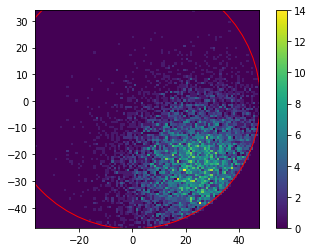

In [9]:
pos = CustomPrior_Bounded2DNormal.rvs(mu=(25,-25), std=15, size = 10000)
x = CustomPrior_x.rvs(pos, size = 10000)
y = CustomPrior_y.rvs(pos, size = 10000)

#plt.scatter(x, y, s=4, edgecolor='none')
plt.hist2d(x, y, bins=100)
plt.colorbar()
plt.gca().add_artist(plt.Circle((0,0), 47.9, color='red', fill=False))
plt.gca().set_aspect(1)

In [10]:
p0_norm = elfi.Prior(CustomPrior_Bounded2DNormal, (25, -25), 15, 47.9)
px_norm = elfi.Prior(CustomPrior_x, p0_norm)
py_norm = elfi.Prior(CustomPrior_y, p0_norm)

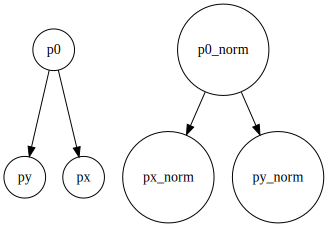

In [11]:
elfi.draw(p0_norm)